

> Bloque con sangría


##𝕪ᶥ = ℓ(𝓌ᵀx + 𝒃)   
##𝓌 < ---- 𝓌 + η(yᴵ - 𝕪) xᴵ   
##𝒃 < ---- 𝒃 + η(yᴵ - 𝕪)

In [ ]:
import numpy as np
import matplotlib.pyplot as mp

###*perceptron class*  
constructor -> n_inputs, learinig_rate -> int, double

In [ ]:
class perceptron:

  def __init__(self,n_inputs,learning_rate):
    self.logical = {'xor':np.array([0,1,1,0]),
                    'and':np.array([1,1,1,1]),
                    'nand':np.array([0,1,1,1])}
    self.w = -1 + 2 * np.random.rand(n_inputs)
    self.b = -1 + 2 * np.random.rand()
    self.eta = learning_rate

  def predict(self, X):
    p = X.shape[1]

    y_est = np.zeros(p)
    for i in range(p):
      y_est[i] = np.dot(self.w,X[:,i]+ self.b)
      if(y_est[i] >= 0):
        y_est[i] = 1
      else:
        y_est[i] = 0
    return y_est

  def fit(self,X,Y,epochs = 20):
    # print(X.shape[1])
    p = X.shape[1]
    for _ in range(epochs):
      for i in range(p):
        y_est = self.predict(X[:,i].reshape(-1,1))
        self.w += self.eta * (Y[:,i] - y_est)*X[:,i]
        self.b += self.eta * (Y[:,i] - y_est)

  def logical_fit(self,X,Y,epochs = 20):
    # print(X.shape[1])
    p = X.shape[1]
    for _ in range(epochs):
      for i in range(p):
        y_est = self.predict(X[i].reshape(-1,1))
        self.w += self.eta * (Y[i] - y_est)*X[:,i]
        self.b += self.eta * (Y[i] - y_est)

  def minMax(self,vector,min,max):
    vector = vector.tolist()
    for i in range(len(vector)):
      vector[i] = [(vector[i]-min)/(max-min)]
    return vector



In [ ]:
def draw_perceptron2d(model):
    w1,w2,b = model.w[0], model.w[1],model.b
    mp.plot([-2,2], [(1/w2)*(-w1*(-2)-b), (1/w2)*(-w1*(2)-b)])

In [ ]:
X = np.array([[0,0,1,1],
              [0,1,0,1]])
# Y = np.array([1,1,0,1])

model = perceptron(2,0.5)
Y = model.logical.get('nand')
model.fit(X,Y)
print(model.predict(X))
# print(model.logical.get('xor'))

#dibujo
p = X.shape[1]
# print(X.shape[1])
for i in range(p):
  if( Y[i] == 0):
    mp.plot(X[0,i],X[1,i], 'or')
  else:
    mp.plot(X[0,i],X[1,i], 'og')

mp.title('Perceptron')
mp.grid('on')
mp.xlim([-2,2])
mp.ylim([-2,2])
mp.xlabel(r'$x_1$')
mp.ylabel(r'$x_2$')
draw_perceptron2d(model)
mp.show()

IndexError: ignored

###Declaraciones de los pesos y alturas para IMC

In [ ]:

# declaracion de los pesos minimos
minW = 40
maxW = 180
minH = 1.2
maxH = 2.2
# np.random.seed(minW)
peso = -minW + (maxW-minW)* np.random.rand(5)
# altura =  (maxH-minH) * np.random.rand(5)
altura =  np.random.uniform(minH,maxH,5)

print('vector sin normalizar: ', peso)
print('vector sin normalizar: ', altura)

# print(model.minMax(peso,minW,maxW))

# print(40 + 180 * np.random.rand(5))

vector sin normalizar:  [34.48738836 75.46109046 55.6378564   5.08748091 30.10407347]
vector sin normalizar:  [1.55218319 2.03034995 2.07893339 1.56367228 2.1483677 ]


###generando los pesos y alturas de manera aleatoria para despues normalizar

In [ ]:
def randWeightHeight(min_W,max_W,min_H,max_H,n_inputs,model):
  # weig = -min_W + (max_W-min_W)* np.random.rand(n_inputs)
  weig = np.random.randint(min_W,max_W,n_inputs)
  heig = np.random.uniform(min_H,max_H,n_inputs)
  imc = weig/ (heig**2)
  Y = (imc > 25) * 1
  # print(Y,imc)
  Y = Y.reshape(1,-1)
  weig = np.array(model.minMax(weig,min_W,max_W))
  heig = np.array(model.minMax(heig,min_H,max_H))
  X = np.concatenate((weig.T, heig.T),axis=0)
  return X, Y

In [ ]:
neuronalIMC = perceptron(2,0.2)
X, Y = randWeightHeight(minW,maxW,minH,maxH,30,neuronalIMC)
# print(type(X))
print(Y)
print(X.shape)
print(Y.shape)

[[1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0]]
(2, 30)
(1, 30)


[1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 0.]


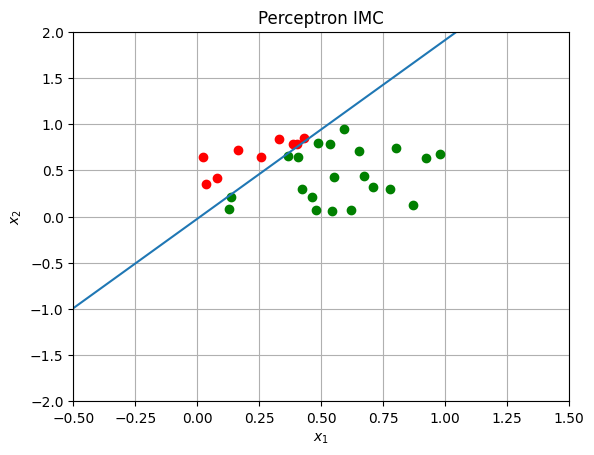

In [ ]:


# heigth = np.array([np.array(x) for x in heigth])

# print('pesos: ',weigth )
# print('alturas: ',heigth)
neuronalIMC = perceptron(2,0.5)
X, Y = randWeightHeight(minW,maxW,minH,maxH,30,neuronalIMC)
#weigth = np.array([np.array(x) for x in weigth])
neuronalIMC.fit(X,Y,100)
print(neuronalIMC.predict(X))


#dibujo
p = X.shape[1]
# print(X.shape[1])
for i in range(p):
  if( Y[:,i] == 0):
    mp.plot(X[0,i],X[1,i], 'or')
  else:
    mp.plot(X[0,i],X[1,i], 'og')

mp.title('Perceptron IMC')
mp.grid('on')
mp.xlim([-0.5,1.5])
mp.ylim([-2,2])
mp.xlabel(r'$x_1$')
mp.ylabel(r'$x_2$')
draw_perceptron2d(neuronalIMC)
mp.show()
